# Lab 03

Histogram processing
- Histogram equalization
- Histogram matching (specification)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from custom_io import plot_images, plot_images_with_histogram 

### Histogram equalization

$s_k = T(r_k) = (L - 1) \sum\limits_{j=0}^{k} p_r(r_j)$

In [3]:
def equalization_function(img):
    """Returns the T in s = T[r]."""
    hist, bins = np.histogram(img, 256, (0, 256))
    cdf = hist.cumsum()
    T = 255 * (cdf / cdf[-1])
    return T.astype(np.uint8)

def histogram_equalize(img):
    T = equalization_function(img)
    return T[img]

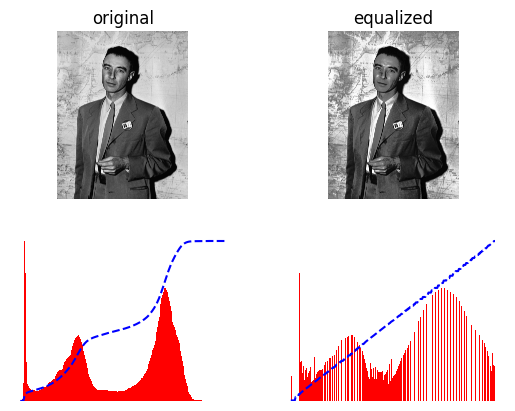

In [4]:
oppenheimer = cv2.imread('data/oppenheimer.jpg', 0)
eqz = histogram_equalize(oppenheimer)
plot_images_with_histogram(oppenheimer, "original", eqz, "equalized")

### Histogram matching

Take an input pixel r. Ask yourself what the percentile of r is (in the source image's histogram). What value has the same percentile in the reference image? That will be z.

$z = G^{-1}[T(r)]$ <br>
where $T(r)$ and $G(z)$ are the histogram-equalization function for the source image and reference image respectively.

In [5]:
def match_histograms(src, ref):
    T = equalization_function(src)
    G = equalization_function(ref)
    return np.interp(T[src], G, range(256)) # x, xp, yp

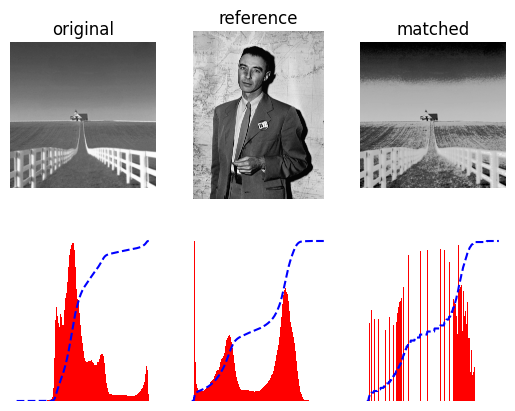

In [6]:
house = cv2.imread("data/house.png", 0)
eqz = match_histograms(src=house, ref=oppenheimer)
plot_images_with_histogram(house, "original", oppenheimer, "reference", eqz, "matched")

To extend this approach to colored images

```python
b, g, r = cv2.split(src)
... # equalize b, g, and r separately
res = np.dstack((b, g, r))
```

### Resizing and cropping

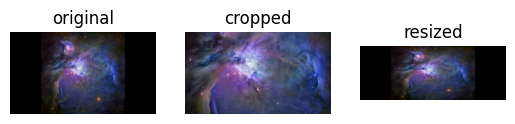

In [7]:
orion = cv2.imread('data/orion.png', 1)

cropped = orion[180: 540, 320: 960]
resized = cv2.resize(orion, (480, 180))

plot_images(orion, "original", cropped, "cropped", resized, "resized")